# Отчет по предмету "Численные методы решения дифференциальных уравнений" 8

Выполнил **Свистельников Илья**


## Задание
Используя схемы переменных направлений и дробных шагов (методы расщепления), решить двумерную
начально-краевую задачу для дифференциального уравнения параболического типа. В
различные моменты времени вычислить погрешность численного решения путем
сравнения результатов с приведенным в задании аналитическим решением $U(x,y)$.  Исследовать зависимость погрешности от сеточных параметров $\tau$, $h_x$, $h_y$.

**Вариант 1**:

$\frac{\partial U}{\partial t} = a\frac{\partial^2 U}{\partial x^2} + a\frac{\partial^2 U}{\partial y^2}, a>0$

$U(0,y, t) = cos(\mu_2 y)exp(-(\mu_1^2 + \mu_2^2)at)$

$U_x(\pi,y,t) = (−1)^\mu_1 cos(\mu_2 y)exp(-(\mu_1^2 + \mu_2^2)at)$

$U_y(x,0,t) = cos(\mu_1 x)exp(-(\mu_1^2 + \mu_2^2)at)$

$U(x,\pi, t) = (−1)^\mu_2 cos(\mu_1 x)exp(-(\mu_1^2 + \mu_2^2)at)$

$U(x,y,0) = cos(\mu_1 x)cos(\mu_2 y)$


Аналитическое решение:

$U(x,y) = cos(\mu_1 x)cos(\mu_2 y)exp(-(\mu_1^2 + \mu_2^2)at)$



## Решение

### **1. Дискретизация уравнения**

**Сетка:**

- По $x$: $x_i = ih_x$, $i = 0, 1, ..., N_x$, $h_x = \frac{\pi}{N_x}$
- По $y$: $y_j = jh_y$, $j = 0, 1, ..., N_y$, $h_y = \frac{\pi}{N_y}$
- По $t$: $t^n = n\tau$, $n = 0, 1, ..., N_t$
- $* = k + 1 / 2$

### **2. C использованием метода дробных шагов**

1. **Первый шаг (только по $x$):**

$$
\frac{U_{i,j}^{*} - U_{i,j}^n}{\tau} = a\frac{U_{i+1,j}^{*} - 2U_{i,j}^{*} + U_{i-1,j}^{*}}{h_x^2}
$$

2. **Второй шаг (только по $y$):**

$$
\frac{U_{i,j}^{n+1} - U_{i,j}^{*}}{\tau} = a\frac{U_{i,j+1}^{n+1} - 2U_{i,j}^{n+1} + U_{i,j-1}^{n+1}}{h_y^2}
$$



### **3. C использованием метода переменных направлений**

Разделим временной шаг на два полушага:

1. **Первый полу-шаг (неявный по $x$, явный по $y$):**

$$
\frac{U_{i,j}^{*} - U_{i,j}^n}{\tau/2} = a\frac{U_{i+1,j}^{*} - 2U_{i,j}^{*} + U_{i-1,j}^{*}}{h_x^2} + a\frac{U_{i,j+1}^n - 2U_{i,j}^n + U_{i,j-1}^n}{h_y^2}
$$

2. **Второй полу-шаг (неявный по $y$, явный по $x$):**

$$
\frac{U_{i,j}^{n+1} - U_{i,j}^{*}}{\tau/2} = a\frac{U_{i+1,j}^{*} - 2U_{i,j}^{*} + U_{i-1,j}^{*}}{h_x^2} + a\frac{U_{i,j+1}^{n+1} - 2U_{i,j}^{n+1} + U_{i,j-1}^{n+1}}{h_y^2}
$$

### **4. Обработка граничных условий:**

1. **Дирихле при $x = 0$:**
- $U_{0,j}^{n} = cos(\mu_2 y_j)exp(-(\mu_1^2 + \mu_2^2)at^n)$

2. **Дирихле при $x = \pi$:**
- $U_{\pi,j}^{n} = (−1)^\mu_1 cos(\mu_2 y_j)exp(-(\mu_1^2 + \mu_2^2)at^n)$

3. **Дирихле при $y = 0$:**
- $U_{i,0}^{n} = cos(\mu_1 x_i)exp(-(\mu_1^2 + \mu_2^2)at^n)$

4. **Дирихле при $y = \pi$:**

- $U_{i,\pi}^{n} = (−1)^\mu_1 cos(\mu_2 x_i)exp(-(\mu_1^2 + \mu_2^2)at^n)$


### Программный код

In [ ]:

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def solve_parabolic_pde(a, Lx, Ly, T, Nx, Ny, Nt, mu):
    """
    Решает двумерное параболическое уравнение методом дробных шагов.

    Параметры:
    a - коэффициент диффузии
    Lx - длина области по x от(0 до Lx)
    Ly - длина области по y от(0 до Ly)
    T - конечное время
    Nx - число узлов по x
    Ny - число узлов по y
    Nt - число временных слоев
    Возвращает:
    u - тензор размерности (Nt+1, Nx+1, Ny+1), содержащий решение
    """
    # Шаги сетки
    hx = Lx / Nx
    hy = Ly / Ny
    tau = T / Nt
    # Координаты сетки
    x = np.linspace(0, Lx, Nx+1)
    y = np.linspace(0, Ly, Ny+1)
    t = np.linspace(0, T, Nt+1)
    # Инициализация решения
    u = np.zeros((Nt+1, Nx+1, Ny+1))
    # Начальное условие
    for i in range(Nx+1):
        for j in range(Ny+1):
            u[0, i, j] = np.cos(mu[0] * x[i]) * np.cos(mu[1] * y[j])
    # Коэффициенты схемы
    lambda_x = a * tau / (2 * hx**2)
    lambda_y = a * tau / (2 * hy**2)
    # Предварительные матрицы для решения СЛАУ
    A_x = np.zeros((Nx+1, Nx+1))
    A_y = np.zeros((Ny+1, Ny+1))
    # Матрица для шага по x
    for i in range(1, Nx):
        A_x[i, i-1] = -lambda_x
        A_x[i, i] = 1 + 2 * lambda_x
        A_x[i, i+1] = -lambda_x
    A_x[0, 0] = 1
    A_x[Nx, Nx] = 1
    # Матрица для шага по y
    for j in range(1, Ny):
        A_y[j, j-1] = -lambda_y
        A_y[j, j] = 1 + 2 * lambda_y
        A_y[j, j+1] = -lambda_y
    A_y[0, 0] = 1
    A_y[Ny, Ny] = 1

    neg_l2_norm_mu = -(mu[0]**2 + mu[1]**2)

    # Временной цикл
    for n in range(Nt):
        # Первый полушаг неявный (по x)
        u_star = np.zeros((Nx+1, Ny+1))
        for j in range(1, Ny):
            # Правая часть
            b = np.zeros(Nx+1)
            for i in range(1, Nx):
                b[i] = u[n, i, j] + lambda_y * (u[n, i, j+1] - 2 * u[n, i, j] + u[n, i, j-1])
            # Применение граничных условий по x
            b[0] = np.cos(mu[1] * y[j]) * np.exp(neg_l2_norm_mu * a * t[n]) # Дирихле при x=0
            b[Nx] = (-1)**mu[0] * np.cos(mu[1] * y[j]) * np.exp(neg_l2_norm_mu * a * t[n]) # Дирихле при x=pi
            # Решение СЛАУ
            u_star[:, j] = np.linalg.solve(A_x, b)
        # Граничные условия по y для промежуточного решения
        for i in range(Nx+1):
            u_star[i, 0] = np.cos(mu[0] * x[i]) * np.exp(neg_l2_norm_mu * a * t[n]) # Дирихле при y=0
            u_star[i, Ny] = (-1)**mu[1] * np.cos(mu[0] * x[i]) * np.exp(neg_l2_norm_mu * a * t[n]) # Дирихле при y=pi

        # Второй полушаг неявный (по y)
        for i in range(1, Nx):
            # Правая часть
            b = np.zeros(Ny+1)
            for j in range(1, Ny):
                b[j] = u_star[i, j] + lambda_x * (u_star[i+1, j] - 2 * u_star[i, j] + u_star[i-1, j])
            # Применение граничных условий по y
            b[0] = u_star[i, 0]
            b[Ny] = u_star[i, Ny]
            # Решение СЛАУ
            u[n+1, i, :] = np.linalg.solve(A_y, b)
        # Граничные условия по x для окончательного решения
        u[n+1, 0, :] = np.cos(mu[1] * y) * np.exp(neg_l2_norm_mu * a * t[n + 1]) # Дирихле при x=0
        u[n+1, Nx, :] = (-1)**mu[0] * np.cos(mu[1] * y) * np.exp(neg_l2_norm_mu * a * t[n + 1]) # Дирихле при x=pi
    return u

In [ ]:
def solve_parabolic_pde_adi(a, Lx, Ly, T, Nx, Ny, Nt, mu):
    """
    Решает двумерное параболическое уравнение методом переменных направлений (ADI).

    Параметры:
    a  - коэффициент диффузии
    Lx - длина области по x (от 0 до Lx)
    Ly - длина области по y (от 0 до Ly)
    T  - конечное время
    Nx - число узлов по x
    Ny - число узлов по y
    Nt - число временных слоев

    Возвращает:
    u  - тензор размерности (Nt+1, Nx+1, Ny+1), содержащий решение
    """
    # Шаги сетки
    hx = Lx / Nx
    hy = Ly / Ny
    tau = T / Nt

    # Координаты сетки
    x = np.linspace(0, Lx, Nx+1)
    y = np.linspace(0, Ly, Ny+1)
    t = np.linspace(0, T, Nt+1)

    # Инициализация решения
    u = np.zeros((Nt+1, Nx+1, Ny+1))

    # Начальное условие
    for i in range(Nx+1):
        for j in range(Ny+1):
            u[0, i, j] = np.cos(mu[0] * x[i]) * np.cos(mu[1] * y[j])

    # Коэффициенты схемы
    lambda_x = a * tau / (2 * hx**2)
    lambda_y = a * tau / (2 * hy**2)

    # Предварительные матрицы для решения СЛАУ
    A_x = np.zeros((Nx+1, Nx+1))
    A_y = np.zeros((Ny+1, Ny+1))

    # Матрица для шага по x
    for i in range(1, Nx):
        A_x[i, i-1] = -lambda_x
        A_x[i, i]   = 1 + 2 * lambda_x
        A_x[i, i+1] = -lambda_x
    A_x[0, 0] = 1
    A_x[Nx, Nx] = 1

    # Матрица для шага по y
    for j in range(1, Ny):
        A_y[j, j-1] = -lambda_y
        A_y[j, j]   = 1 + 2 * lambda_y
        A_y[j, j+1] = -lambda_y
    A_y[0, 0] = 1
    A_y[Ny, Ny] = 1

    neg_l2_norm_mu = -(mu[0]**2 + mu[1]**2)

    # Временной цикл
    for n in range(Nt):
        # Первый полушаг (неявный по x, явный по y)
        u_star = np.zeros((Nx+1, Ny+1))
        for j in range(1, Ny):
            # Правая часть
            b = np.zeros(Nx+1)
            for i in range(1, Nx):
                b[i] = u[n, i, j] + lambda_y * (u[n, i, j+1] - 2 * u[n, i, j] + u[n, i, j-1])
            # Граничные условия по x
            b[0] = np.cos(mu[1] * y[j]) * np.exp(neg_l2_norm_mu * a * t[n]) # Дирихле при x=0
            b[Nx] = (-1)**mu[0] * np.cos(mu[1] * y[j]) * np.exp(neg_l2_norm_mu * a * t[n]) # Дирихле при x=pi
            # Решение СЛАУ
            u_star[:, j] = np.linalg.solve(A_x, b)
        # Граничные условия по y для промежуточного решения
        for i in range(Nx+1):
            u_star[i, 0] = np.cos(mu[0] * x[i]) * np.exp(neg_l2_norm_mu * a * t[n]) # Дирихле при y=0
            u_star[i, Ny] = (-1)**mu[1] * np.cos(mu[0] * x[i]) * np.exp(neg_l2_norm_mu * a * t[n]) # Дирихле при y=pi

        # Второй полушаг (неявный по y, явный по x)
        for i in range(1, Nx):
            # Правая часть
            b = np.zeros(Ny+1)
            for j in range(1, Ny):
                b[j] = u_star[i, j] + lambda_x * (u_star[i+1, j] - 2 * u_star[i, j] + u_star[i-1, j])
            # Граничные условия по y
            b[0] = u_star[i, 0]
            b[Ny] = u_star[i, Ny]
            # Решение СЛАУ
            u[n+1, i, :] = np.linalg.solve(A_y, b)
        # Граничные условия по x для окончательного решения
        u[n+1, 0, :] = np.cos(mu[1] * y) * np.exp(neg_l2_norm_mu * a * t[n + 1]) # Дирихле при x=0
        u[n+1, Nx, :] = (-1)**mu[0] * np.cos(mu[1] * y) * np.exp(neg_l2_norm_mu * a * t[n + 1]) # Дирихле при x=pi

    return u

In [ ]:
def compute_error(u_numeric, x, y, t, a, mu):
    U_exact = analytical_solution(x, y, t, a, mu)
    error = np.abs(u_numeric - U_exact)
    max_error = np.max(error)
    return max_error

# Аналитическое решение
def analytical_solution(x, y, t, a, mu):
    X, Y = np.meshgrid(x, y, indexing='ij')
    neg_l2_norm_mu = -(mu[0]**2 + mu[1]**2)
    return np.cos(mu[0] * X) * np.cos(mu[1] * Y) * np.exp(neg_l2_norm_mu * a * t)

In [ ]:
def error_vs_tau(mu):
    # Параметры задачи
    a = 1.0
    Lx = np.pi
    Ly = np.pi
    T = 0.1
    Nx = 50  # фиксированный шаг по x
    Ny = 50  # фиксированный шаг по y
    tau_values = [T / Nt for Nt in [10, 20, 40, 50, 80]]
    errors_fs = []
    errors_adi = []

    for tau in tau_values:
        Nt = int(T / tau)
        x = np.linspace(0, Lx, Nx+1)
        y = np.linspace(0, Ly, Ny+1)
        t = np.linspace(0, T, Nt+1)

        # Решение методом дробных шагов
        u_fs = solve_parabolic_pde(a, Lx, Ly, T, Nx, Ny, Nt, mu)
        max_error_fs = compute_error(u_fs[-1], x, y, T, a, mu)
        errors_fs.append(max_error_fs)

        # Решение методом переменных направлений
        u_adi = solve_parabolic_pde_adi(a, Lx, Ly, T, Nx, Ny, Nt, mu)
        max_error_adi = compute_error(u_adi[-1], x, y, T, a, mu)
        errors_adi.append(max_error_adi)

    # Построение графика
    plt.figure(figsize=(8, 6))
    tau_values = np.array(tau_values)
    plt.loglog(tau_values, errors_fs, 'o-', label='Метод дробных шагов')
    plt.loglog(tau_values, errors_adi, 's-', label='Метод переменных направлений')
    plt.xlabel('$\\tau$')
    plt.ylabel('Максимальная ошибка')
    plt.title('Зависимость ошибки от шага по времени $\\tau$')
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()

In [ ]:
# Параметры задачи
a = 1.0
Lx = np.pi
Ly = np.pi
T = 5
Nx = 50
Ny = 50
Nt = 1000
mu = [2, 1]


## Метод дробных шагов

In [ ]:
# Решение уравнения методом дробных шагов
u = solve_parabolic_pde(a, Lx, Ly, T, Nx, Ny, Nt, mu)


Максимальная погрешность при t = 5: 1.1942597963907005e-12


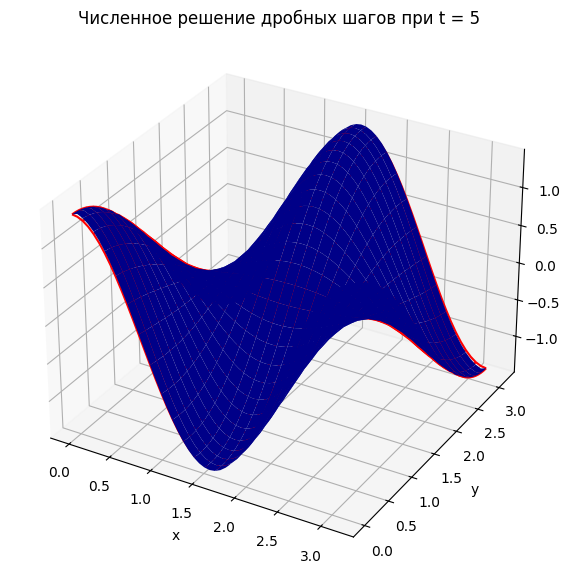

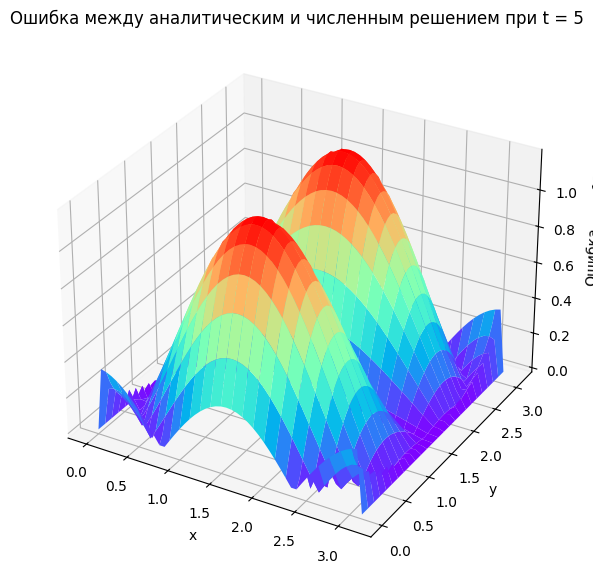

In [ ]:
# Вычисление погрешности в момент времени t = T
x = np.linspace(0, Lx, Nx+1)
y = np.linspace(0, Ly, Ny+1)
max_error = compute_error(u[-1], x, y, T, a, mu)
print(f"Максимальная погрешность при t = {T}: {max_error}")

# Визуализация численного решения в момент времени t = T
X, Y = np.meshgrid(x, y, indexing='ij')
U_numeric = u[-1]
U_exact = analytical_solution(x, y, T, a, mu)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
analitic_surf = ax.plot_wireframe(X, Y, U_exact, color="red")
surf = ax.plot_surface(X, Y, U_numeric, color='blue')
ax.set_title(f'Численное решение дробных шагов при t = {T}')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
plt.show()

# Вычисление и визуализация ошибки между аналитическим и численным решением
error = np.abs(U_numeric - U_exact) * 0.1
fig_error = plt.figure(figsize=(10, 7))
ax_error = fig_error.add_subplot(111, projection='3d')
error_surf = ax_error.plot_surface(X, Y, error, cmap='rainbow')
ax_error.set_title(f'Ошибка между аналитическим и численным решением при t = {T}')
ax_error.set_xlabel('x')
ax_error.set_ylabel('y')
ax_error.set_zlabel('Ошибка')
plt.show()

## Метод переменных направлений

In [ ]:
# Решение уравнения методом переменных направлений
u_adi = solve_parabolic_pde_adi(a, Lx, Ly, T, Nx, Ny, Nt, mu)

Максимальная погрешность (ADI) при t = 5: 1.1942597963907005e-12


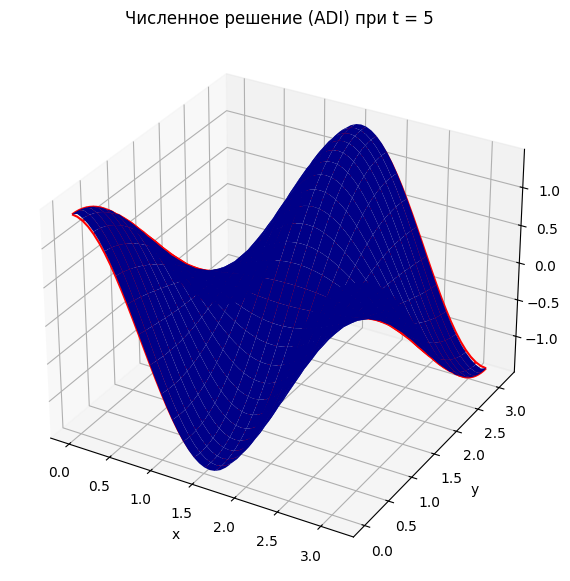

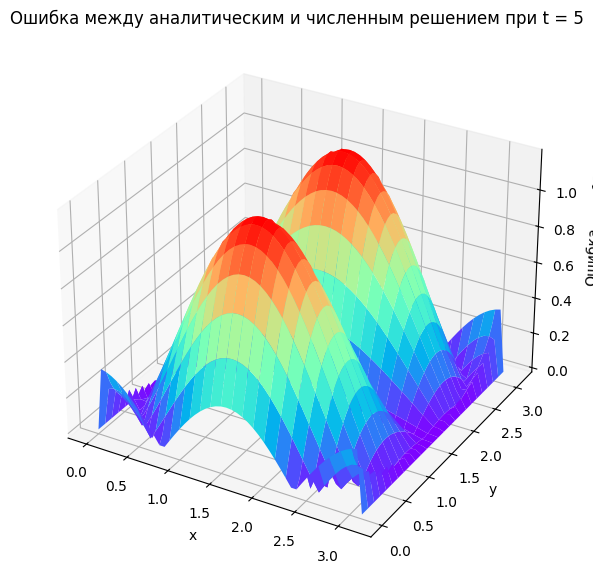

In [ ]:
# Вычисление погрешности в момент времени t = T
max_error_adi = compute_error(u_adi[-1], x, y, T, a, mu)
print(f"Максимальная погрешность (ADI) при t = {T}: {max_error_adi}")

# Визуализация численного решения методом ADI в момент времени t = T
U_numeric_adi = u_adi[-1]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
analitic_surf = ax.plot_wireframe(X, Y, U_exact, color="red")
surf = ax.plot_surface(X, Y, U_numeric_adi, color='blue')
ax.set_title(f'Численное решение (ADI) при t = {T}')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
plt.show()

error = np.abs(U_numeric_adi - U_exact)
fig_error = plt.figure(figsize=(10, 7))
ax_error = fig_error.add_subplot(111, projection='3d')
error_surf = ax_error.plot_surface(X, Y, error, cmap='rainbow')
ax_error.set_title(f'Ошибка между аналитическим и численным решением при t = {T}')
ax_error.set_xlabel('x')
ax_error.set_ylabel('y')
ax_error.set_zlabel('Ошибка')
plt.show()